In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)

(543, 8)
(233, 7)


In [4]:
train_df.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [5]:
test_df.head(1)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0


##### score metric The leaderboard is evaluated using sklearn.metrics.log_loss for the participant’s submission.

### Let's explore the given training dataset

In [6]:
train_df.isna().any()

City                    False
Location_Score          False
Internal_Audit_Score    False
External_Audit_Score    False
Fin_Score               False
Loss_score              False
Past_Results            False
IsUnderRisk             False
dtype: bool

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [8]:
train_df.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [55]:
(train_df['IsUnderRisk'].value_counts())

1    340
0    203
Name: IsUnderRisk, dtype: int64

In [9]:
(train_df['City'].value_counts())[:10]

40    55
9     45
6     38
41    36
10    35
2     31
5     27
37    27
38    26
31    25
Name: City, dtype: int64

In [10]:
len(train_df['City'].unique())

43

# Co-relation

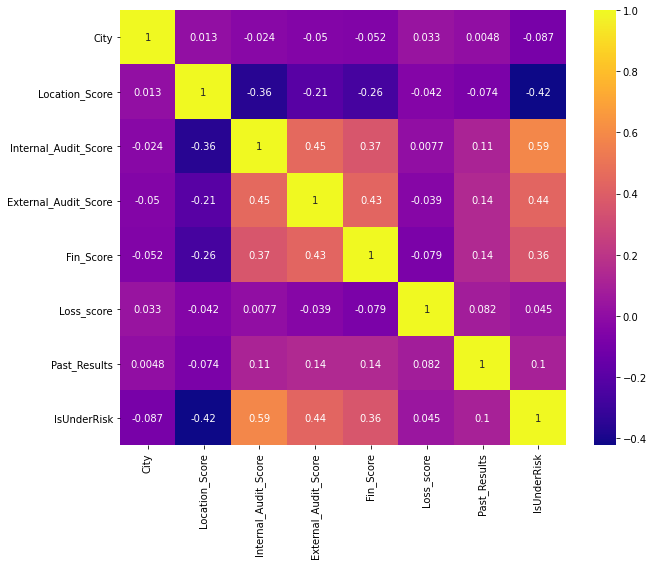

In [11]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='plasma',linecolor='black')

# Spilting dataset

In [12]:
X = train_df.drop("IsUnderRisk",axis=1)
y = train_df.IsUnderRisk

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(380, 7)
(380,)
(163, 7)
(163,)


# PCA

In [27]:
# from sklearn.decomposition import PCA
# temp_pca = PCA(n_components=None)
# X_temp =temp_pca.fit_transform(X_train)
# variance = temp_pca.explained_variance_ratio_
# print(variance)

In [28]:

# plt.figure(figsize=(8,6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,7,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.show()
# # ploting cum

In [29]:
# pca = PCA(n_components=6)
# X_train =pca.fit_transform(X_train)
# X_test = pca.fit(X_test)

# Loss

In [30]:
from sklearn.metrics import log_loss

# Modelling

### LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200, )
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print("LogisticRegression log_loss : {}". format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

LogisticRegression log_loss : 0.41070599398105645


0.8236842105263158

### SVC

In [32]:
from sklearn.svm import SVC

clf= SVC(probability=True,)

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('SVC log loss {0:0.4f}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

SVC log loss 0.3894


0.8973684210526316

### KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=41,)

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('KNeighborsClassifier log loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

KNeighborsClassifier log loss 0.40016844489014425


0.8289473684210527

### DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier( max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('D-Tree log_loss{}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

D-Tree log_loss0.4285665454992392


0.8342105263157895

### RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier( n_estimators=100, )

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('RandomForestClassifier log loss{}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

RandomForestClassifier log loss0.32986842192110166


1.0

### XGBClassifier

In [39]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.04, n_estimators=100, max_depth=2,
                        min_child_weight=4, 
                         seed=27)

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
print('XGboost log_loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

XGboost log_loss 0.3436825583900319


0.8710526315789474

### CatBoostClassifier

In [40]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
print('CatBoostClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

Learning rate set to 0.006816
0:	learn: 0.6861285	total: 62ms	remaining: 1m 1s
1:	learn: 0.6794076	total: 67ms	remaining: 33.4s
2:	learn: 0.6726769	total: 70.4ms	remaining: 23.4s
3:	learn: 0.6664125	total: 74.9ms	remaining: 18.7s
4:	learn: 0.6592405	total: 78.3ms	remaining: 15.6s
5:	learn: 0.6528086	total: 80.9ms	remaining: 13.4s
6:	learn: 0.6470068	total: 82.8ms	remaining: 11.7s
7:	learn: 0.6417701	total: 84.5ms	remaining: 10.5s
8:	learn: 0.6348611	total: 85.9ms	remaining: 9.45s
9:	learn: 0.6289138	total: 87.3ms	remaining: 8.64s
10:	learn: 0.6238619	total: 88.7ms	remaining: 7.97s
11:	learn: 0.6181615	total: 89.9ms	remaining: 7.4s
12:	learn: 0.6124021	total: 91.1ms	remaining: 6.91s
13:	learn: 0.6065517	total: 91.9ms	remaining: 6.47s
14:	learn: 0.6005929	total: 93ms	remaining: 6.11s
15:	learn: 0.5955515	total: 94ms	remaining: 5.78s
16:	learn: 0.5904486	total: 95ms	remaining: 5.49s
17:	learn: 0.5849678	total: 96ms	remaining: 5.24s
18:	learn: 0.5793476	total: 96.8ms	remaining: 5s
19:	lear

297:	learn: 0.2393274	total: 367ms	remaining: 864ms
298:	learn: 0.2388977	total: 368ms	remaining: 863ms
299:	learn: 0.2386456	total: 369ms	remaining: 861ms
300:	learn: 0.2384269	total: 370ms	remaining: 860ms
301:	learn: 0.2378984	total: 371ms	remaining: 858ms
302:	learn: 0.2375821	total: 372ms	remaining: 856ms
303:	learn: 0.2374450	total: 373ms	remaining: 854ms
304:	learn: 0.2370628	total: 374ms	remaining: 852ms
305:	learn: 0.2366618	total: 375ms	remaining: 850ms
306:	learn: 0.2364220	total: 376ms	remaining: 848ms
307:	learn: 0.2359298	total: 377ms	remaining: 846ms
308:	learn: 0.2356681	total: 377ms	remaining: 844ms
309:	learn: 0.2353728	total: 379ms	remaining: 843ms
310:	learn: 0.2350906	total: 380ms	remaining: 841ms
311:	learn: 0.2347203	total: 381ms	remaining: 840ms
312:	learn: 0.2342572	total: 382ms	remaining: 838ms
313:	learn: 0.2338459	total: 383ms	remaining: 837ms
314:	learn: 0.2335208	total: 384ms	remaining: 835ms
315:	learn: 0.2332555	total: 385ms	remaining: 833ms
316:	learn: 

478:	learn: 0.1943163	total: 552ms	remaining: 601ms
479:	learn: 0.1941980	total: 559ms	remaining: 605ms
480:	learn: 0.1940272	total: 560ms	remaining: 604ms
481:	learn: 0.1938244	total: 561ms	remaining: 603ms
482:	learn: 0.1936242	total: 562ms	remaining: 602ms
483:	learn: 0.1932861	total: 563ms	remaining: 601ms
484:	learn: 0.1931867	total: 564ms	remaining: 599ms
485:	learn: 0.1929659	total: 565ms	remaining: 598ms
486:	learn: 0.1925965	total: 566ms	remaining: 597ms
487:	learn: 0.1922850	total: 567ms	remaining: 595ms
488:	learn: 0.1921815	total: 568ms	remaining: 594ms
489:	learn: 0.1919753	total: 570ms	remaining: 593ms
490:	learn: 0.1917986	total: 571ms	remaining: 592ms
491:	learn: 0.1916221	total: 573ms	remaining: 591ms
492:	learn: 0.1914051	total: 573ms	remaining: 590ms
493:	learn: 0.1909884	total: 574ms	remaining: 588ms
494:	learn: 0.1908527	total: 575ms	remaining: 587ms
495:	learn: 0.1907519	total: 576ms	remaining: 585ms
496:	learn: 0.1905584	total: 577ms	remaining: 584ms
497:	learn: 

679:	learn: 0.1585403	total: 742ms	remaining: 349ms
680:	learn: 0.1583400	total: 743ms	remaining: 348ms
681:	learn: 0.1581060	total: 744ms	remaining: 347ms
682:	learn: 0.1579737	total: 744ms	remaining: 346ms
683:	learn: 0.1578991	total: 745ms	remaining: 344ms
684:	learn: 0.1577472	total: 746ms	remaining: 343ms
685:	learn: 0.1575459	total: 747ms	remaining: 342ms
686:	learn: 0.1572673	total: 748ms	remaining: 341ms
687:	learn: 0.1571823	total: 749ms	remaining: 340ms
688:	learn: 0.1568829	total: 750ms	remaining: 339ms
689:	learn: 0.1567914	total: 751ms	remaining: 338ms
690:	learn: 0.1567387	total: 752ms	remaining: 336ms
691:	learn: 0.1566595	total: 753ms	remaining: 335ms
692:	learn: 0.1565069	total: 754ms	remaining: 334ms
693:	learn: 0.1563741	total: 755ms	remaining: 333ms
694:	learn: 0.1561655	total: 756ms	remaining: 332ms
695:	learn: 0.1558701	total: 757ms	remaining: 331ms
696:	learn: 0.1557227	total: 758ms	remaining: 330ms
697:	learn: 0.1555264	total: 759ms	remaining: 329ms
698:	learn: 

883:	learn: 0.1294875	total: 927ms	remaining: 122ms
884:	learn: 0.1292997	total: 928ms	remaining: 121ms
885:	learn: 0.1290877	total: 929ms	remaining: 120ms
886:	learn: 0.1288693	total: 932ms	remaining: 119ms
887:	learn: 0.1287084	total: 933ms	remaining: 118ms
888:	learn: 0.1285698	total: 934ms	remaining: 117ms
889:	learn: 0.1284121	total: 935ms	remaining: 116ms
890:	learn: 0.1282898	total: 936ms	remaining: 115ms
891:	learn: 0.1282056	total: 937ms	remaining: 113ms
892:	learn: 0.1280009	total: 938ms	remaining: 112ms
893:	learn: 0.1279353	total: 939ms	remaining: 111ms
894:	learn: 0.1278425	total: 940ms	remaining: 110ms
895:	learn: 0.1276636	total: 941ms	remaining: 109ms
896:	learn: 0.1274814	total: 942ms	remaining: 108ms
897:	learn: 0.1273657	total: 943ms	remaining: 107ms
898:	learn: 0.1271647	total: 944ms	remaining: 106ms
899:	learn: 0.1269661	total: 946ms	remaining: 105ms
900:	learn: 0.1267971	total: 947ms	remaining: 104ms
901:	learn: 0.1266744	total: 948ms	remaining: 103ms
902:	learn: 

0.9894736842105263

### AdaBoostClassifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

clf= AdaBoostClassifier(base_estimator=None,
    n_estimators=100,
    learning_rate=0.05,
    random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('AdaBoostClassifier log loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

AdaBoostClassifier log loss 0.4123089607886983


0.8842105263157894

### BaggingClassifier

In [42]:
from sklearn.ensemble import BaggingClassifier
clf= BaggingClassifier(#base_estimator=base_cls,
    n_estimators=100,
   )

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
print('BaggingClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

BaggingClassifier log_loss 0.5124222020585918


1.0

### GaussianNB

In [43]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('GaussianNB log loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB log loss 0.3573005144625513


0.868421052631579

### Hist_gradient_boosting

In [44]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf= HistGradientBoostingClassifier( #loss='binary_crossentropy',
    learning_rate=0.05,
#     max_iter=6000,
    max_depth=6,
#     max_leaf_nodes=5,
   )

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('HistGradientBoostingClassifier log loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

HistGradientBoostingClassifier log loss 0.3042889059445497


0.9447368421052632

### LGBMClassifier

In [45]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
print('LGBMClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier log_loss 0.3264950273944623


0.9973684210526316

# Using HyperOpt to find best parameters

In [66]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'hyperopt'

### GradientBoostingClassifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier


In [47]:
print(GradientBoostingClassifier())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [65]:
clf= GradientBoostingClassifier(max_depth=2,
                                learning_rate=0.1,
                                min_samples_split=2,
                                min_samples_leaf=1, 
                                subsample=1,
                                max_features='sqrt',
                                random_state=10)

clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

print('GradientBoostingClassifier log loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

GradientBoostingClassifier log loss 0.3076357987931048


0.9078947368421053

## Submission

In [60]:
test_df = pd.DataFrame(sc.transform(test_df), columns = test_df.columns)


In [61]:
y_pred = clf.predict_proba(test_df)
result_data_df = pd.DataFrame(y_pred)

In [62]:
result_data_df.to_excel('submit.xlsx',index=False)